# Système bielle manivelle 

![](schema.png)

## Equations de liaison

Le système d'équation de liaison est donnée par la condition $\overrightarrow{B_2B_3}=\vec{0}$

Ce qui conduit aux système d'équations de liaison : $\hspace{0.5cm} \begin{cases} f_1(x,\phi)=x-r cos(\theta)-l cos(\theta+\phi)=0 \\ f_2(x,\phi)=r sin(\theta)+lsin(\theta+\phi)=0 \end{cases}$

qui possède la solution analytique : 
$ \hspace{0.5cm} x=rcos(\theta)+\sqrt{l^2-r^2sin^2\theta} \hspace{1cm}  \text{et} \hspace{1cm} tan(\theta+\phi)=\dfrac{rsin(\theta)}{\sqrt{l^2-r^2sin^2\theta}} $

Nous allons utiliser cette solution analytique pour valider la résolution numérique de ce système d'équations non linéaires

## Tracé de la solution analytique

In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

In [2]:
# paramétres géométrique excentricité vilebrequin r(m) et longueur bielle l(m)
r=0.04; l=0.2;
#
# vitesse de rotation du villebrequin N (tr/min) omega(rd/s)
#
N=1000; omega=N*2*pi/60
# 
# le vecteur inconnu sera z=[x,phi], on va définir ici sa valeur initiale
z = np.array([l+r, 0])

In [3]:
# définition des paramétres de mouvement pour mieux comprendre la résolution en lien avec le document support
x=z[0]; phi=z[1]; theta0=0
#
# amplitude de simulation amp_N (en nombre de tours du vilebrequin) amp_deg (en deg) et amp (en rd)
amp_N=1; amp_deg=amp_N*360; amp=amp_N*2*pi
#
# imcrement de simulation dtheta_deg (deg) dtheta (rd)
dtheta_deg=10; dtheta=dtheta_deg*pi/180;
#
# nombre d'incrément de simulation
ninc=np.int32(np.ceil(amp/dtheta))

Définition de la solution analytique $x_a$ et $\phi_a$ pour toutes les valeurs de $\theta_a$ situées dans l'intervalle défini ci-dessus

In [4]:
theta_a = np.linspace(0, amp, ninc)
x_a=
phi_a=

Tracé direct $ x=f_x(\theta)$ en utilisant les fonctions pyplot

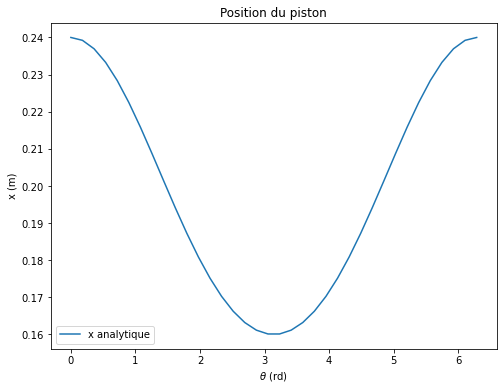

In [5]:
plt.figure(figsize=(8, 6))
plt.xlabel(r'$ \theta $ (rd)')
plt.ylabel('x (m)')
plt.title('Position du piston')
plt.plot(theta_a, x_a, label='x analytique')
plt.legend();

Tracé orienté objet de $\theta+\phi=f_{\phi}(\theta)$ par création d'une figure et d'un "axe" (un graphe) ax 

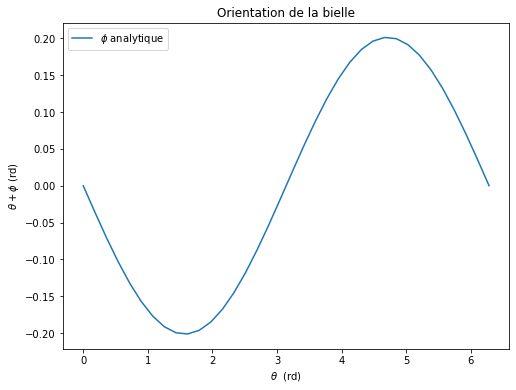

In [6]:
fig_phi, ax = plt.subplots(figsize=(8, 6)) # création de la figure et de l'axe ax (du tracé ax)  
ax.plot(theta_a, phi_a+theta_a, label='$\phi$ analytique')
ax.set_xlabel(r'$ \theta $  (rd)')  # on ajoute un libellé sur l’axe des x.
ax.set_ylabel(r'$ \theta+\phi $ (rd)')  # idem pour l’axe des y
ax.set_title('Orientation de la bielle')  # on ajoute un titre, toujours avec une méthode sur l’objet axes.
ax.legend();  # enfin, on ajoute la légende, encore et toujours avec une méthode de l’axes. 

## Résolution numérique / Newton-Raphson / Jacobienne analytique

In [7]:
from numpy.linalg import inv, norm

In [8]:
# initialisation des tableaux pour stocker la solution numérique
x_n = np.zeros(ninc)
phi_n = np.zeros(ninc)
theta_n = np.zeros(ninc)
#
# parcours de positions du vilebrquin en incrémentant theta
for j in range(ninc):
#   initialisation du test de convergence et calcul de la valeur courante de theta
    ecart=1;
    theta=j*dtheta
#
# bloucle de Newton Raphson pour chaque valeur de theta
    while ecart > 1e-8:
# définition de la valeur courante des fonctions du système à résoudre
        f1=
        f2=
        f=np.array([f1,f2])
# définition de la matrice Jacobienne analytique
        J1=
        J2=
        J=np.array([J1,J2])
#  calcul de l'accroissement et de la nouvelle solution
        dz=
        z=
        ecart=norm(dz)
        x=z[0]
        phi=z[1]
# fin boucle while
    x_n[j]=x; phi_n[j]=phi; theta_n[j]=theta
# fin boucle for
#

## Tracé de l'orientation de la bielle

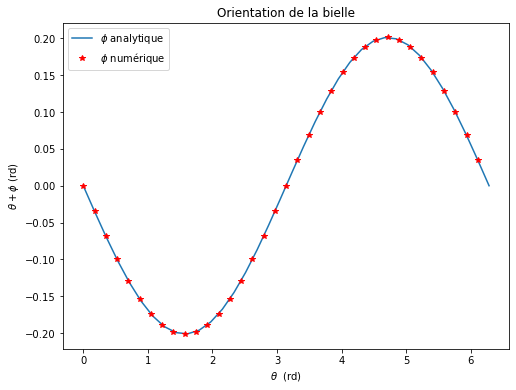

In [9]:
fig_phi, ax = plt.subplots(figsize=(8, 6))
ax.plot(theta_a, phi_a+theta_a, label = '$\phi$ analytique')
ax.plot(theta_n, phi_n+theta_n, 'r*', label = '$\phi$ numérique')
ax.set_xlabel(r'$ \theta $  (rd)')
ax.set_ylabel(r'$ \theta+\phi $ (rd)')
ax.set_title('Orientation de la bielle')
ax.legend();

## Tracé de la position du piston

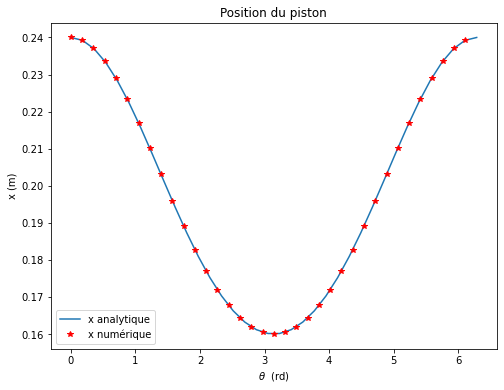

In [10]:
fig_x, bx = plt.subplots(figsize=(8, 6))
bx.plot(theta_a, x_a, label='x analytique')
bx.plot(theta_n, x_n, 'r*', label = 'x numérique')
bx.set_xlabel(r'$ \theta $  (rd)')
bx.set_ylabel('x (m)')
bx.set_title('Position du piston')
bx.legend();

## Résolution numérique / Newton-Raphson / Jacobienne numérique

### Calcul de la valeur courante des fonctions et de la jacobienne numérique

In [11]:
def J_bm(x,theta,phi,r,l):
#
# petit incrément nécessaire au calcul des dérivées
    epsilon=1E-6
#
# valeur courante des fonctions
    f1=
    f2=
    f=np.array([f1,f2])
# valeurs incrémentées des fonctions
    f1_dx=
    f1_dphi=
    f2_dx=
    f2_dphi=
# calcul de la jacobienne
    J11=
    J12=
    J21=
    J22=
#
    J=np.array([[J11,J12],[J21,J22]])
# 
# définition de la sortie
    return f,J

### Résolution

In [12]:
# réinitialisation de la position initiale
# pour ne pas partir de la dernière position calculée par la précédente résolution numérique
z = np.array([l+r, 0])
x=z[0]; phi=z[1]
#
# parcours de positions du vilebrquin en incrémentant theta
for j in range(ninc):
#   initialisation du test de convergence et calcul de la valeur courante de theta
    ecart=1;
    theta=j*dtheta
#
# bloucle de Newton Raphson pour chaque valeur de theta
    while ecart > 1e-8:
# calcul de la valeur courante des fonctions et de la jacobienne du système à résoudre
        f,J=
#  calcul de l'accroissement et de la nouvelle solution
        dz=
        z=
        ecart=norm(dz)
        x=z[0]
        phi=z[1]
# fin boucle while
    x_n[j]=x; phi_n[j]=phi; theta_n[j]=theta
# fin boucle for
#

## Tracés

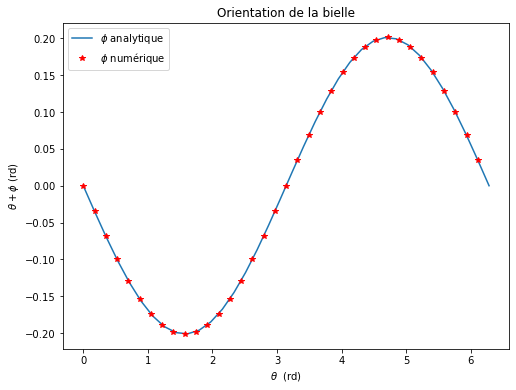

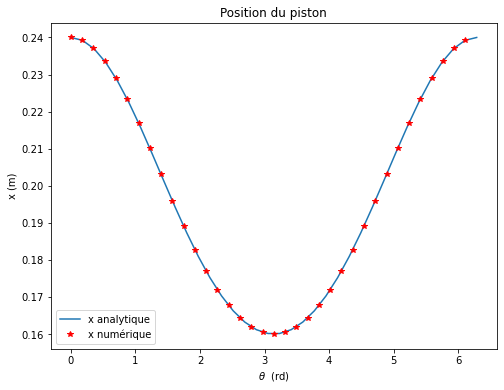

In [13]:
fig_phi, ax = plt.subplots(figsize=(8, 6))
ax.plot(theta_a, phi_a+theta_a, label = '$\phi$ analytique')
ax.plot(theta_n, phi_n+theta_n, 'r*', label = '$\phi$ numérique')
ax.set_xlabel(r'$ \theta $  (rd)')
ax.set_ylabel(r'$ \theta+\phi $ (rd)')
ax.set_title('Orientation de la bielle')
ax.legend();
#
fig_x, bx = plt.subplots(figsize=(8, 6))
bx.plot(theta_a, x_a, label='x analytique')
bx.plot(theta_n, x_n, 'r*', label = 'x numérique')
bx.set_xlabel(r'$ \theta $  (rd)')
bx.set_ylabel('x (m)')
bx.set_title('Position du piston')
bx.legend();